 Load and Inspect the Dataset

In [2]:
import pandas as pd

# Load the dataset
url = '/content/bank-full.csv'
data = pd.read_csv(url, sep=';')

# Display the first few rows and some basic info
print(data.head())
print(data.info())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

Preprocess the Data


In [3]:
# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

# Check the shape of the data
print(X.shape, y.shape)


(45211, 42) (45211,)


Split the Data into Training and Testing Sets

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape)


(31647, 42) (13564, 42)


Train a Decision Tree Classifier


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8720141551164848
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     11966
        True       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



In [ ]:
visualize the decision tree


In [9]:
from sklearn.tree import DecisionTreeClassifier--
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifier with a limited max depth
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth to 3
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

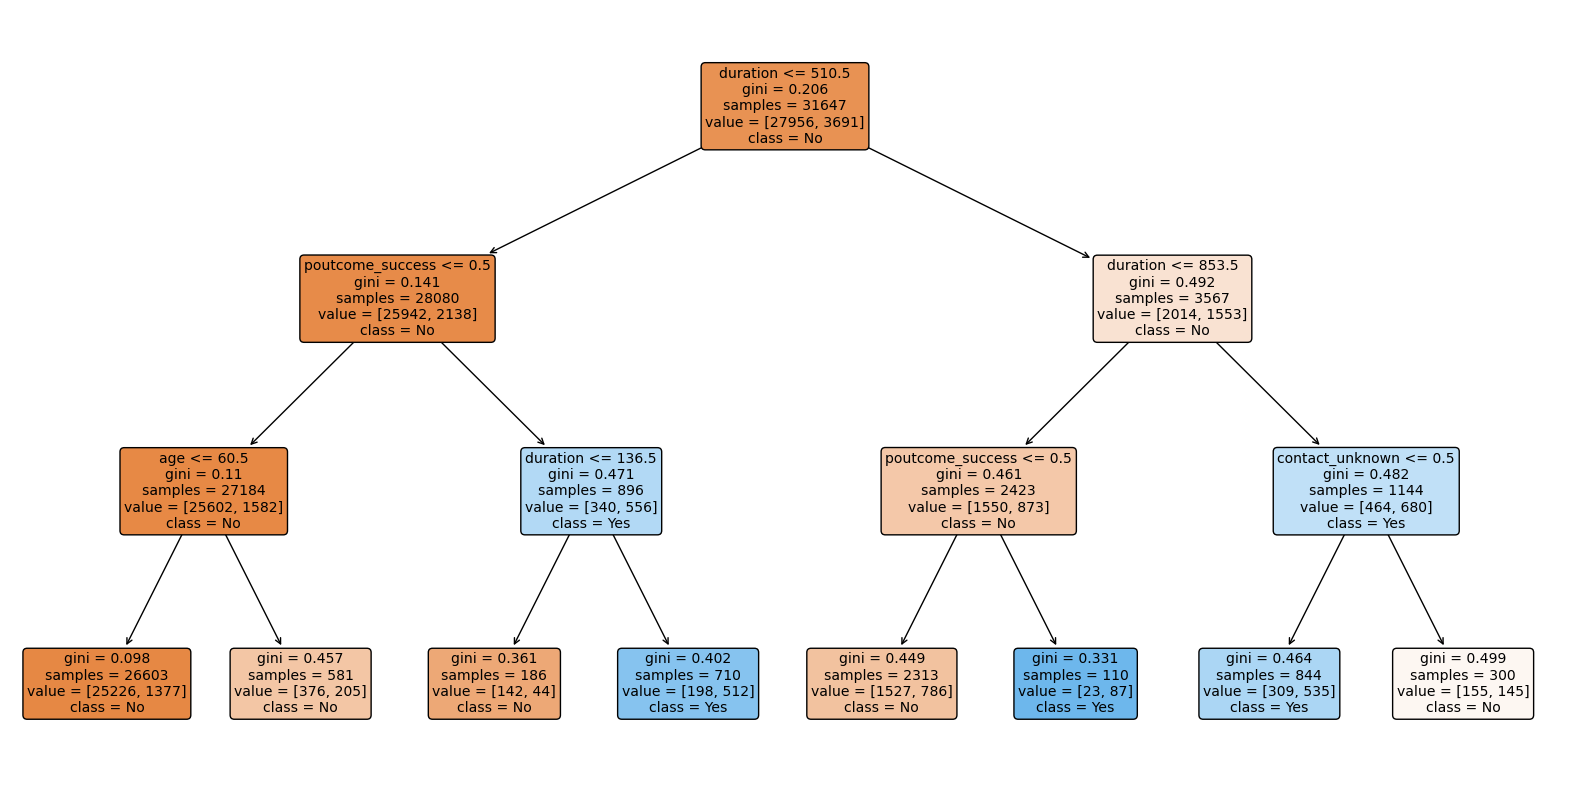

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree with the limited depth
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()
